# Mall Customers Dataset
The Mall customers dataset contains information about people visiting the mall. The dataset has gender, customer id, age, annual income, and spending score. It collects insights from the data and group customers based on their behaviors.

https://data-flair.training/blogs/machine-learning-datasets/

## 1. Importando as bibliotecas

In [1]:
import numpy as np #Importante para manipulação de dados numéricos
import pandas as pd #Para conseguir importar o dataset (bom para .csv e .xlsx)
import matplotlib.pyplot as plt #Responsável por fazer os gráficos
from mpl_toolkits.mplot3d import axes3d #Responsável por fazer os gráficos 3D


## 2. Importando o dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv') #pd.read_csv é responsável por converter o arquivo .csv em DataFrame
X = dataset #Os features geralmente são chamados de X quando for manipulado
print(X.head()) #.head() é responsável por verificar as 5 primeiras linhas do dataset

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


## 3. Verificando se há falta de dados

In [3]:
X.isnull().any() #.isnull().any() checa se há valores null na tabela

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

## 4. Análise do DataSet
Nota-se que seria interessante aplicar Regressão Linear para prever o 'Spending Score' do cliente. Seria interessante fazer a mesma coisa para o 'Annual Income(k$)' e também para o 'Age'. Nesses casos seria interessante aplicar um OneHotEncoder para eliminar os dados escritos para transformá-los em binários, pois a Regressão Linear trabalha somente com números.

Esse Dataset também pode ser visto não possuindo um target, assim sendo um problema de K-Means. Nesse problema, eu vejo que não tem o porquê trabalhar com o 'Genre' pois seriam valores binários, e isso não irá trazer valores de centroides interessantes. Desse modo, eu escolho ficar com as variáveis 'Age', 'Annual Income (k$)' e 'Spending Score'. Irei realizar o algoritmo e plotar em um gráfico 3D a relação de todas essas variáveis. 

## 5. Aplicando o algoritmo do K-Means

* Inicialize 2 pontos aleatórios do data set chamando-os de centroides
* Atribua todos os exemplos do dataset em um grupo baseado em um dos centroides criados
* Mova o centroide: Calcule a média para todos os pontos dentro de cada grupo do centroide, e mova o centroide para essas médias
* Refaça os dois passos anteriores repetidamente até achar os grupos <br><br>

* Há dois *for* loops: <br>
1. Atribuição do agrupamento: Faz um vetor c onde c(i) representa os centroids atribuidos ao exemplo x(i) <br><br>
![Equação](imagens/Capturar.PNG), onde:<br><br> ![Equação2](imagens/Capturar2.PNG) <br><br>
2. Movimentação do centroide: Move cada centroide para a média dos exemplos do seu grupo <br><br>
![Equação3](imagens/Capturar3.PNG) <br><br>

Obs: Se aparecer um centroide com 0 pontos, é possível inicializar esse centroid a um novo ponto ou então simplesmente elimine-o. <br><br>
### Objetivo da otimização <br>
Será necessário pegar alguns parâmetros do algoritmo:<br>
* μk = centroide do agrupamento de k
* μc = centroide do grupo em que o exemplo x(i) está inserido<br><br>
Com essas variáveis, é possível definir a função de custo do K-Means:<br><br>
![Equação4](imagens/Capturar4.PNG) <br><br>
O objetivo é encontrar o min J(c,µ).<br>
Nós estamos achando o valor de c (agrupamentos) e µ (centroides), que irá minimizar a média das distâncias de todos os exemplos do treino (cada linha do dataset) de acordo com o seu centroide correspondente. A função mostrada acima é a função de custo que pode ser chamada de distorção dos exemplos do treino. <br><br>
No primeiro for é minimizado o J(...) com c(1),...,c(m) mantendo µ(1),...,µ(k) fixados.<br>  
No segundo for é minimzado J(...) com µ(1),...,µ(k). <br><br>
Obs: O algoritmo de K-Means só reduz a função de custo, se ela aumentar, algo está errado.


### Função findClosestCentroids(X,centroids)
Essa função é responsável por determinar qual é o centroide mais próximo de cada exemplo do dataset.

*Parâmetros da função:*<br>
X = features do dataset<br>
centroids = set dos centroides determinado com a função _________<br>

*Parâmetros internos da função:*<br>
K = número de grupos que foi determinado pelo método do cotovelo<br>
a = (nlinhas,ncolunas) do dataset<br>
idx = grupo do qual o exemplo pertence<br>
resmin = a menor distância do centroide<br>

*Retorno:*<br>
idx




In [4]:
#Função para determinar qual é o centroide mais próximo
def findClosestCentroids (X,centroids):
    K = centroids.shape
    a = X.shape
    idx = np.zeros(a[0])
    resmin = np.zeros(K[0])

    for i in range(a[0]):
        for j in range(K[0]):
            resmin[j] = np.linalg.norm(X[i,:]-centroids[j,:],2)
        idx[i] = np.argmin(resmin)
    return idx

### Função computeCentroids(X,idx,K)
Essa função é responsável por mover o centroide do dataset.

*Parâmetros da função:*<br>
X = features do dataset<br>
idx = indices de cada exemplo<br>
K = numero de centroides determinado pelo usuário<br>

*Parâmetros internos da função:*<br>
m,n = (nlinhas,ncolunas) do dataset<br>
centroids = coordenadas das centroides do dataset <br>
centroidlist = criação da lista para colocar cada centroide no lugar<br>

*Retorno:*<br>
centroids

In [5]:
#Função para mover o centroide
def computeCentroids (X, idx, K):
    m,n = X.shape
    centroids = np.zeros((K,n))
    centroidlist = []

    for i in range(K):
        for j in range(m):
            if idx[j] == i:
                centroidlist.append(j)
        for a in range(n):
            centroids[i,a] = np.mean(X[centroidlist,a])
        centroidlist = []
    return centroids

### Função costFuncKMeans(X,centroids,idx)
Essa função é responsável por verificar a função de custo (custo = erro). A ideia do sistema é sempre diminuir o erro para que o algoritmo esteja correto.

*Parâmetros da função:*<br>
X = features do dataset<br>
centroids = coordenadas das centroides do dataset<br>
idx = indices de cada exemplo<br>

*Parâmetros internos da função:*<br>
m,n = (nlinhas,ncolunas) do dataset<br>
cost = número de centroides determinado pelo usuário x número de variáveis do dataset<br>
centroidlist = criação da lista para colocar cada centroid no lugar<br>

*Retorno:*<br>
cost

In [6]:
#Função para determinar a função de custo do K-Means
def costFuncKMeans (X,centroids,idx):
    m,n = X.shape
    cost = 0
    for i in range(m):
        cost += np.linalg.norm(X[i,:]-centroids[int(idx[i]),:],2)
    cost = cost/m
    return cost

In [7]:
#Função para executar o algoritmo do K-Means, o qual é a mescla 
#das funções findClosestCentroids e computeCentroids
def runKMeans (X,initial_centroids,max_iters):
    m,n = X.shape
    K = initial_centroids.shape
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)

    for i in range(max_iters):
        idx = findClosestCentroids(X,centroids)
        centroids = computeCentroids(X,idx,K[0])
    return centroids,idx

### Random Initialization
No K-Means, é necessário criar centroides com pontos aleatórios. 

In [8]:
#K-Means tem um problema de determinar quais são as centroides iniciais
#A função a seguir escolhe pontos aleatórios do próprio dataset para
#determinar qual será o melhor ponto de início dos centroides
def randomInialization(X,K):
    m,n = X.shape
    initial_centroids = np.zeros((K,n))
    random = np.zeros(K)
    np.random.seed(1)

    for i in range(K):
        random[i] = np.random.randint(m)
        if i>0:
            if random[i] in random[0:i]:
                random[i] = np.random.randint(m)
                
    for i in range(K):
        initial_centroids[i,:] = X[int(random[i]),:]

    return initial_centroids

def randomInializationLoop (X,K,max_iters):
    m,n = X.shape
    J_grad = np.zeros(100)
    centroids_grad = np.zeros((100,K*n))
    idx_grad = np.zeros((100,m))

    for i in range(100):
        initial_centroids = randomInialization(X,K)
        centroids, idx = runKMeans(X,initial_centroids,max_iters)
        J_grad[i] = costFuncKMeans(X,centroids,idx)
        centroids_grad[i] = centroids.ravel()
        idx_grad[i,:] = idx

    mincost = np.min(J_grad)
    print(mincost)
    mincostidx = np.argmin(J_grad)
    idx = idx_grad[mincostidx]
    initial_centroids = centroids_grad[mincostidx]
    initial_centroids = initial_centroids.reshape(centroids.shape)
    print(initial_centroids)

    return initial_centroids,idx


### Choosing Number
Essa função é responsável por fazer o gráfico do método do cotovelo. Como visto anteriormente, basta escolher o ponto quando fica plano. A imagem do gráfico abaixo apresenta como escolher um bom número de grupos K.<br>

![Gráfico1](imagens/Capturar5.png) <br><br>


In [12]:
#O K-Means também precisa saber qual será o número necessário de grupos em que se deseja dividir o dataset
#O método utilizado é o Elbow Method, o qual verifica o gráfico do erro de custo por número de centroides
def choosingNumber(X,K_numbers,max_iters):
    J_grad = np.zeros(K_numbers)
    for i in np.arange(1,K_numbers+1):
        centroids,idx = randomInializationLoop(X,i,max_iters)
        J_grad[i-1] = costFuncKMeans(X,centroids,idx)
        
    plt.plot(np.arange(1,K_numbers+1),J_grad)


## 6. Manipulando o dataset e verificando o número de grupos


In [10]:
X = X.loc[:,['Age','Annual Income (k$)','Spending Score (1-100)']].values #Transformando o dataset X em um array do Numpy pois é mais fácil manipular os dados numéricos com o Numpy.
print(X[0:4,:])
print(X.shape)

[[19 15 39]
 [21 15 81]
 [20 16  6]
 [23 16 77]]
(200, 3)


### O método do cotovelo
Esse método plota a função de custo (J) de acordo com o número de agrupamentos (K). A função de custo reduz quando aumenta o número de agrupamentos. Visualizando o gráfico, é escolhido o valor de K quando a função de custo começa a ser plana.

35.58326773108009
[[38.85 60.56 50.2 ]]
30.78968745062319
[[36.21641791 57.63432836 64.35820896]
 [44.1969697  66.5        21.45454545]]
25.093174582558717
[[28.77922078 64.84415584 75.03896104]
 [40.39473684 87.         18.63157895]
 [47.28235294 44.85882353 41.81176471]]
20.468250917276336
[[24.82142857 28.71428571 74.25      ]
 [40.39473684 87.         18.63157895]
 [44.89473684 48.70526316 42.63157895]
 [32.69230769 86.53846154 82.12820513]]
18.36581023404036
[[25.25       25.83333333 76.91666667]
 [41.64705882 88.73529412 16.76470588]
 [54.06       40.46       36.72      ]
 [32.69230769 86.53846154 82.12820513]
 [33.39622642 58.05660377 48.77358491]]
15.432713147142003
[[25.27272727 25.72727273 79.36363636]
 [41.68571429 88.22857143 17.28571429]
 [56.34090909 53.70454545 49.38636364]
 [32.69230769 86.53846154 82.12820513]
 [27.         56.65789474 49.13157895]
 [44.31818182 25.77272727 20.27272727]]
14.709920236586681
[[ 25.27272727  25.72727273  79.36363636]
 [ 41.96        79.64

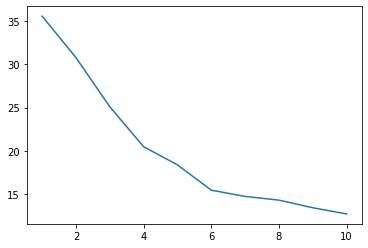

In [13]:
K_numbers = 10
max_iters = 10
J = choosingNumber(X,K_numbers,max_iters)

O gráfico aparenta possuir uma menor queda quando K = 6. Desse modo será escolhido K = 6, quando há 3 variáveis.

## 7. K=6: Gráfico 

Irei calcular as coordenadas do centroide novamente porém com um valor maior de iterações para minimizar os erros. Em seguida plotarei o gráfico 3D para visualizar como foi agrupado cada cliente.

In [28]:
K=6
max_iters = 10
centroides,y = randomInializationLoop (X,K,max_iters)

15.432713147142003
[[25.27272727 25.72727273 79.36363636]
 [41.68571429 88.22857143 17.28571429]
 [56.34090909 53.70454545 49.38636364]
 [32.69230769 86.53846154 82.12820513]
 [27.         56.65789474 49.13157895]
 [44.31818182 25.77272727 20.27272727]]


In [29]:
print(centroides,y)


[[25.27272727 25.72727273 79.36363636]
 [41.68571429 88.22857143 17.28571429]
 [56.34090909 53.70454545 49.38636364]
 [32.69230769 86.53846154 82.12820513]
 [27.         56.65789474 49.13157895]
 [44.31818182 25.77272727 20.27272727]] [5. 0. 5. 0. 5. 0. 5. 0. 5. 0. 5. 0. 5. 0. 5. 0. 5. 0. 5. 0. 5. 0. 5. 0.
 5. 0. 5. 0. 5. 0. 5. 0. 5. 0. 5. 0. 5. 0. 5. 0. 2. 0. 5. 4. 5. 0. 2. 4.
 4. 4. 2. 4. 4. 2. 2. 2. 2. 2. 4. 2. 2. 4. 2. 2. 2. 4. 2. 2. 4. 4. 2. 2.
 2. 2. 2. 4. 2. 4. 4. 2. 2. 4. 2. 2. 4. 2. 2. 4. 4. 2. 2. 4. 2. 4. 4. 4.
 2. 4. 2. 4. 4. 2. 2. 4. 2. 4. 2. 2. 2. 2. 2. 4. 4. 4. 4. 4. 2. 2. 2. 2.
 4. 4. 4. 3. 4. 3. 1. 3. 1. 3. 1. 3. 4. 3. 1. 3. 1. 3. 1. 3. 1. 3. 4. 3.
 1. 3. 1. 3. 1. 3. 1. 3. 1. 3. 1. 3. 1. 3. 1. 3. 1. 3. 1. 3. 1. 3. 1. 3.
 1. 3. 1. 3. 1. 3. 1. 3. 1. 3. 1. 3. 1. 3. 1. 3. 1. 3. 1. 3. 1. 3. 1. 3.
 1. 3. 1. 3. 1. 3. 1. 3.]


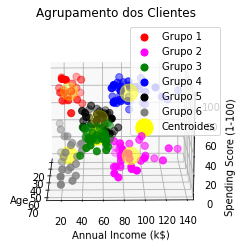

In [30]:
plt.figure()
ax = plt.axes(projection="3d")
zline = X[:,0]
yline = X[:,1]
xline = X[:,2]



ax.scatter3D(X[y == 0, 0], X[y == 0, 1],X[y == 0, 2], s = 50, c = 'red', label = 'Grupo 1')
ax.scatter3D(X[y == 1, 0], X[y == 1, 1],X[y == 1, 2], s = 50, c = 'magenta', label = 'Grupo 2')
ax.scatter3D(X[y == 2, 0], X[y == 2, 1],X[y == 2, 2], s = 50, c = 'green', label = 'Grupo 3')
ax.scatter3D(X[y == 3, 0], X[y == 3, 1],X[y == 3, 2], s = 50, c = 'blue', label = 'Grupo 4')
ax.scatter3D(X[y == 4, 0], X[y == 4, 1],X[y == 4, 2], s = 50, c = 'black', label = 'Grupo 5')
ax.scatter3D(X[y == 5, 0], X[y == 5, 1],X[y == 5, 2], s = 50, c = 'grey', label = 'Grupo 6')

ax.scatter3D(centroides[:, 0], centroides[:, 1], centroides[:, 2], s = 300, c = 'yellow', label = 'Centroides')

plt.title('Agrupamento dos Clientes')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.legend()

for angle in range(0, 360):
    ax.view_init(15, angle)
    plt.draw()

plt.show()


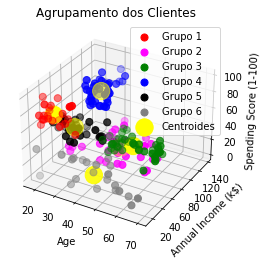

In [31]:
plt.figure()
ax = plt.axes(projection="3d")
zline = X[:,0]
yline = X[:,1]
xline = X[:,2]



ax.scatter3D(X[y == 0, 0], X[y == 0, 1],X[y == 0, 2], s = 50, c = 'red', label = 'Grupo 1')
ax.scatter3D(X[y == 1, 0], X[y == 1, 1],X[y == 1, 2], s = 50, c = 'magenta', label = 'Grupo 2')
ax.scatter3D(X[y == 2, 0], X[y == 2, 1],X[y == 2, 2], s = 50, c = 'green', label = 'Grupo 3')
ax.scatter3D(X[y == 3, 0], X[y == 3, 1],X[y == 3, 2], s = 50, c = 'blue', label = 'Grupo 4')
ax.scatter3D(X[y == 4, 0], X[y == 4, 1],X[y == 4, 2], s = 50, c = 'black', label = 'Grupo 5')
ax.scatter3D(X[y == 5, 0], X[y == 5, 1],X[y == 5, 2], s = 50, c = 'grey', label = 'Grupo 6')

ax.scatter3D(centroides[:, 0], centroides[:, 1], centroides[:, 2], s = 300, c = 'yellow', label = 'Centroides')

plt.title('Agrupamento dos Clientes')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.legend()


plt.show()

Há pessoas relativamente jovens que possui um score alto e possuem um salário de médio para alto. Talvez possa dizer que pessoas jovens que ganham relativamente bem, tendem a gastar mais nessa loja. 

Há pessoas jovens, que possuem uma renda relativamente baixa e possuem um score alto. Com essa afirmação pode-se dizer que essa loja atrai bem jovens.

Há pessoas jovens que ganham um salário mediano em relação aos outros. Eles possuem um score médio. Pode-se dizer que essa loja possui coisas que chamam muita atenção dos jovens, com esses 3 grupos analisados, porém pode-se trabalhar para que esse grupo tenha um score mais elevado. Uma vez que pessoas com renda baixa e com renda alta possuem score alto entre os jovens.

Há pessoas que possuem uma faixa etária entre 30-60 anos e possuem um salário médio para alto, mas tem um score baixo. Esse pode ser um grupo que não se sente atraído com as mercadorias dessa loja.

Há pessoas que possuem um score baixo e renda relativamente baixa e são da mesma faixa etária de 30-60. Isso reforça que a loja não atende muito bem as pessoas mais velhas.

Há pessoas que são similares ao jovens com renda mediana e score médio, porém são pessoas mais velhas. Esse grupo pode ser estudado para conseguir chamar atenção das pessoas mais velhas, pois estas tendem a gastar menos nessa loja.

Conclusão: Essa deve ser uma loja que chama mais atenção das pessoas jovens, pode ser de roupas que atraem pessoas mais jovens, como a Vans. Caso a empresa queira atingir um público maior, será necessário criar vestimentas que encaixariam pessoas com mais idade.